# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [261]:
df.shape

(1010, 12)

In [262]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                       int64
address                        float64
Year                             int64
Age                            float64
dtype: object

In [263]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [264]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB
None


In [265]:
print(df.describe())

        math score  reading score  writing score   id_student  address  \
count  1010.000000    1010.000000    1010.000000  1010.000000      0.0   
mean     66.420792      64.930693      70.289109  1494.599010      NaN   
std      15.481187      18.990769      19.125831   291.537945      NaN   
min      13.000000      15.000000      23.000000  1000.000000      NaN   
25%      56.000000      54.000000      58.000000  1242.250000      NaN   
50%      66.000000      68.000000      68.000000  1494.500000      NaN   
75%      77.000000      78.000000      79.000000  1746.750000      NaN   
max     120.000000     100.000000     100.000000  1999.000000      NaN   

              Year         Age  
count  1010.000000  943.000000  
mean   2021.104950   15.483563  
std       7.681396    1.151707  
min    1990.000000   14.000000  
25%    2023.000000   14.000000  
50%    2023.000000   16.000000  
75%    2023.000000   17.000000  
max    2023.000000   17.000000  


In [266]:
print(df.isnull().sum())

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1010
Year                              0
Age                              67
dtype: int64


In [267]:
df['Year'].unique()

array([2023, 1990], dtype=int64)

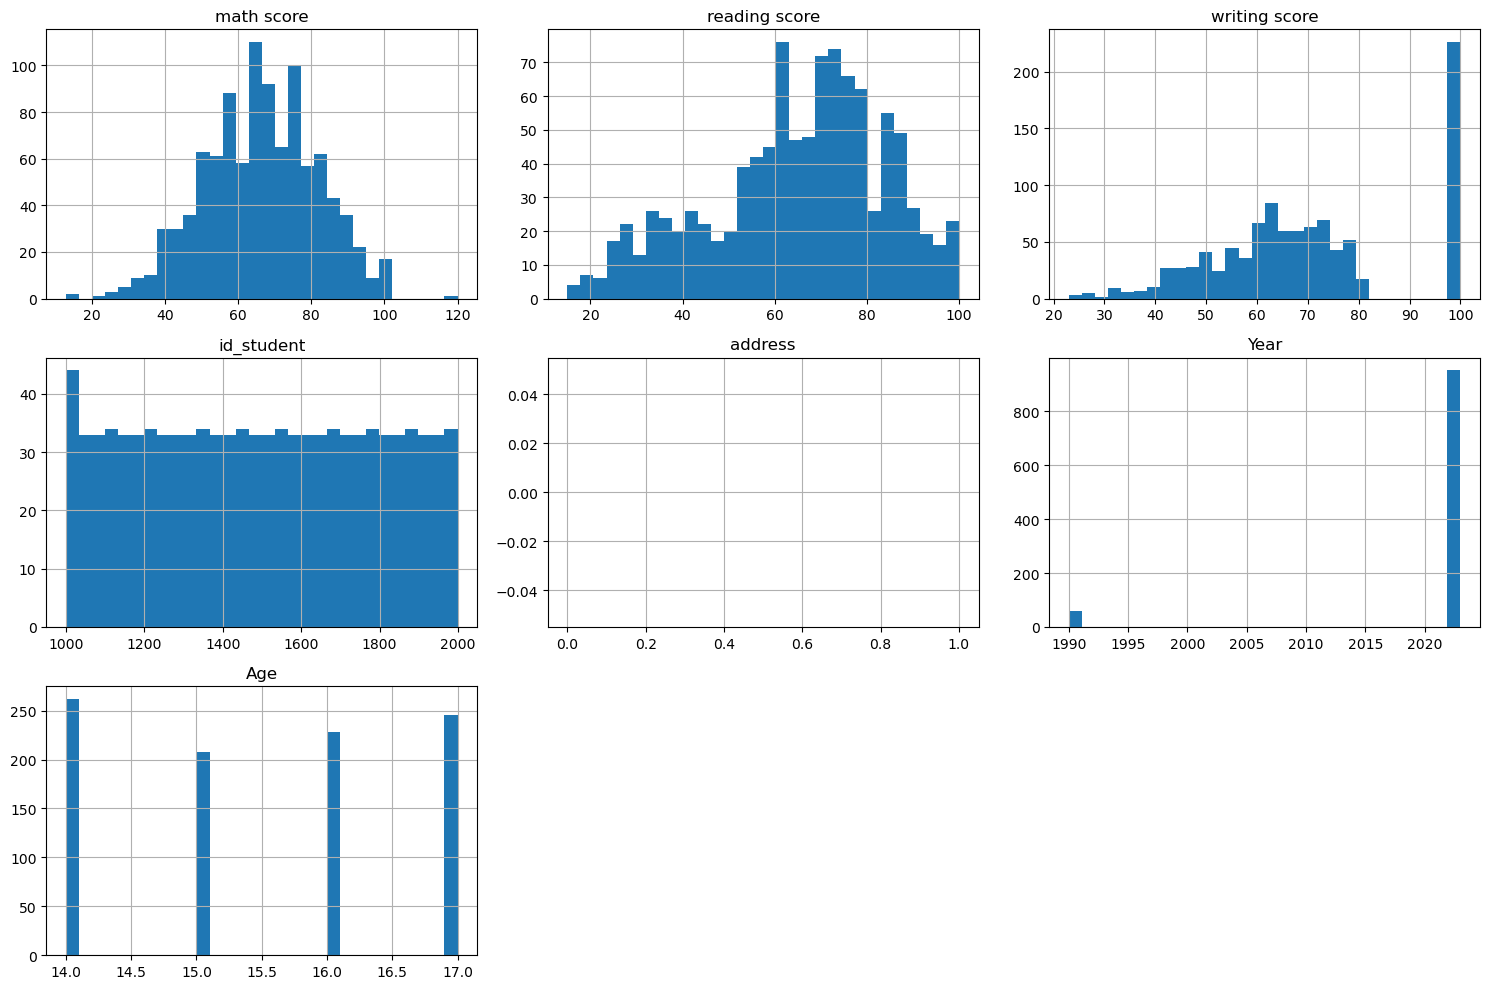

In [268]:
#columnas numéricas
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

### 2. Explore the columns that are objects (string)

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

### 4. What may be happening with the year? 

### 5. Do we have any duplicates? 

### 6.1. Missing values: Remember the column address

### 6.2. What about the missing values of the column Age? 

### 7. What is going on with the math scores?

## Do some initial plots? EDA

In [269]:
##ADRESS##
df["address"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1005   NaN
1006   NaN
1007   NaN
1008   NaN
1009   NaN
Name: address, Length: 1010, dtype: float64

In [270]:

df.drop("address", axis=1, inplace=True)
"address" in df.columns
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'Year', 'Age'],
      dtype='object')

In [271]:
df[df['math score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
11,Female,group D,high school,standard,completed,120,87,100,1011,2023,16.0


In [272]:
df['math score'].value_counts()

math score
63     36
77     31
71     30
74     28
57     27
       ..
23      1
120     1
29      1
34      1
25      1
Name: count, Length: 78, dtype: int64

In [273]:
df = df[df['math score'] <= 100]
df[df['math score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age


In [274]:
df["gender"]=df["gender"].str.lower()
df["gender"].value_counts()

gender
male      524
female    485
Name: count, dtype: int64

In [275]:
df["Year"].value_counts()


Year
2023    951
1990     58
Name: count, dtype: int64

In [276]:
df=df[df["Year"]!=1990]
df["Year"].value_counts()

Year
2023    951
Name: count, dtype: int64

In [277]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                      0
reading score                   0
writing score                   0
id_student                      0
Year                            0
Age                            62
dtype: int64

In [278]:
#df=df[df['Age'] <= 100]
#esta no porque la edad de los nulos lo normal es que estuviera entere 14-17
#quitar supone perder info de alumnos por un variable con poca variación

#otra opcion aleatorio np.random

round(df["Age"].mean(),0)
#df=df["Age"].fillna(round(df["Age"].mean(), 0), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)


C:\Users\enrique.penalver.GLOBAL\AppData\Local\Temp\ipykernel_10868\3376625780.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [279]:
df['Age'].value_counts()

Age
14.000000    243
17.000000    235
16.000000    214
15.000000    197
15.496063     62
Name: count, dtype: int64

In [280]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
id_student                     0
Year                           0
Age                            0
dtype: int64

In [282]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,some high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


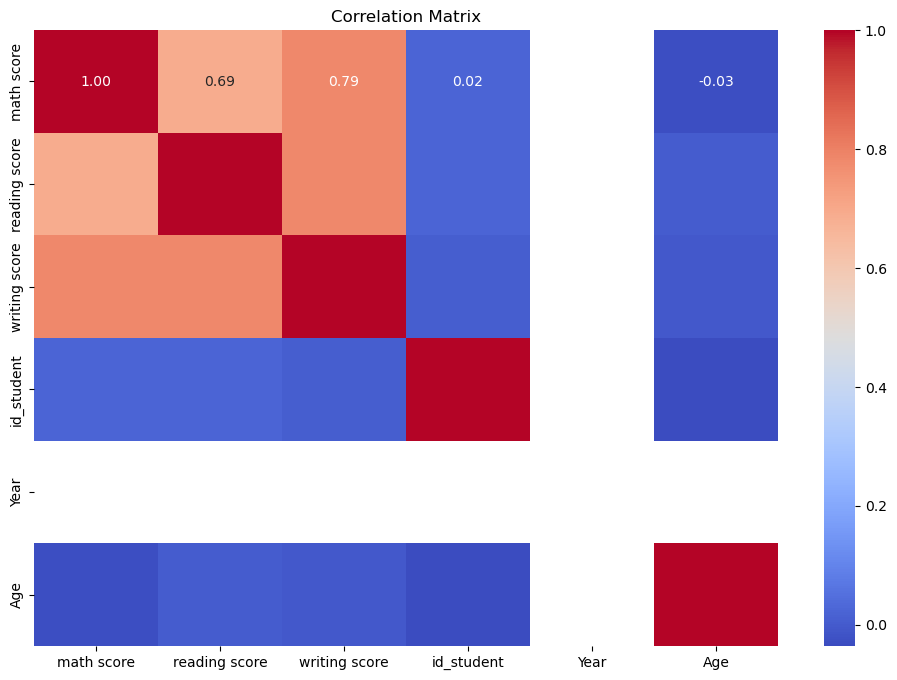

In [283]:
# Seleccionar solo las columnas numéricas correctamente
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
corr_matrix = numeric_columns.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

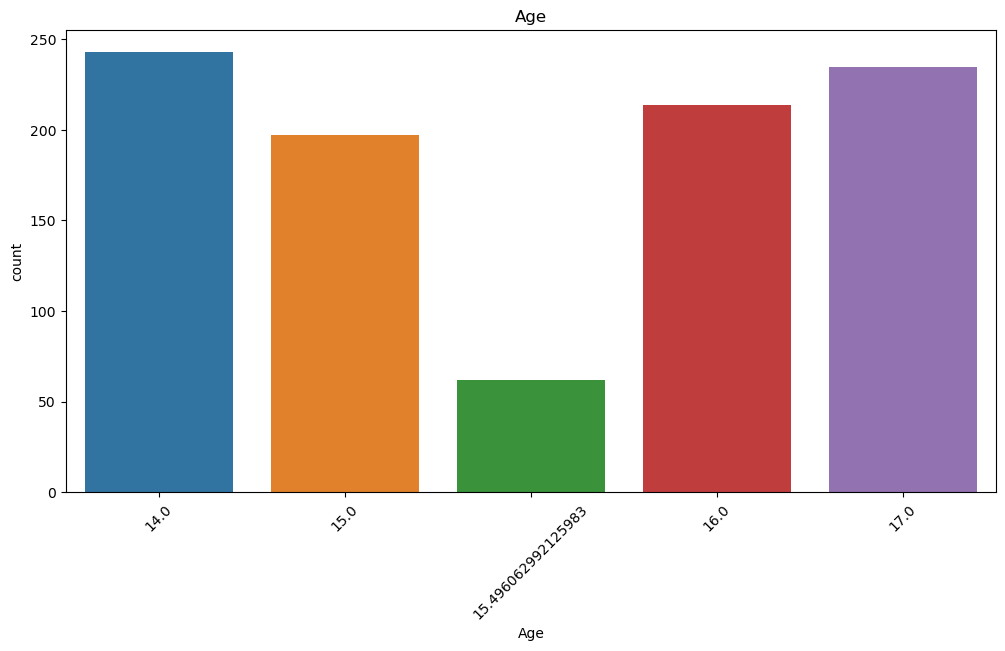

In [286]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df)
plt.xticks(rotation=45)
plt.title('Age')
plt.show()


<Axes: xlabel='gender'>

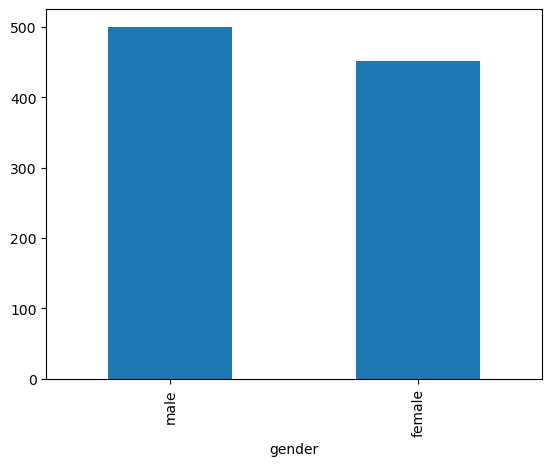

In [287]:
df["gender"].value_counts().plot(kind="bar")

In [291]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'Year', 'Age'],
      dtype='object')

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

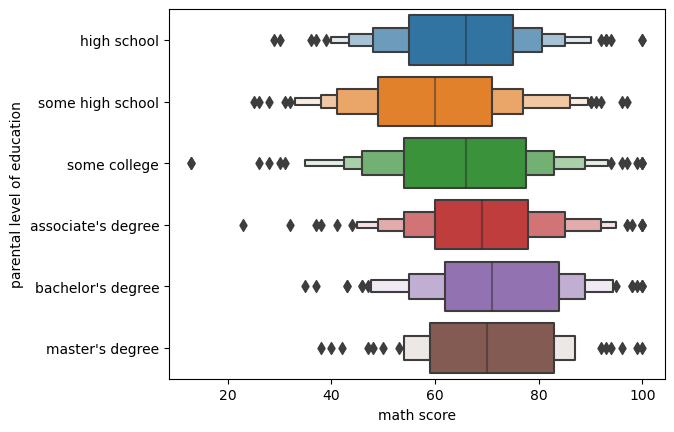

In [293]:
sns.boxenplot(x="math score", y="parental level of education", data=df)
plt.show()

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

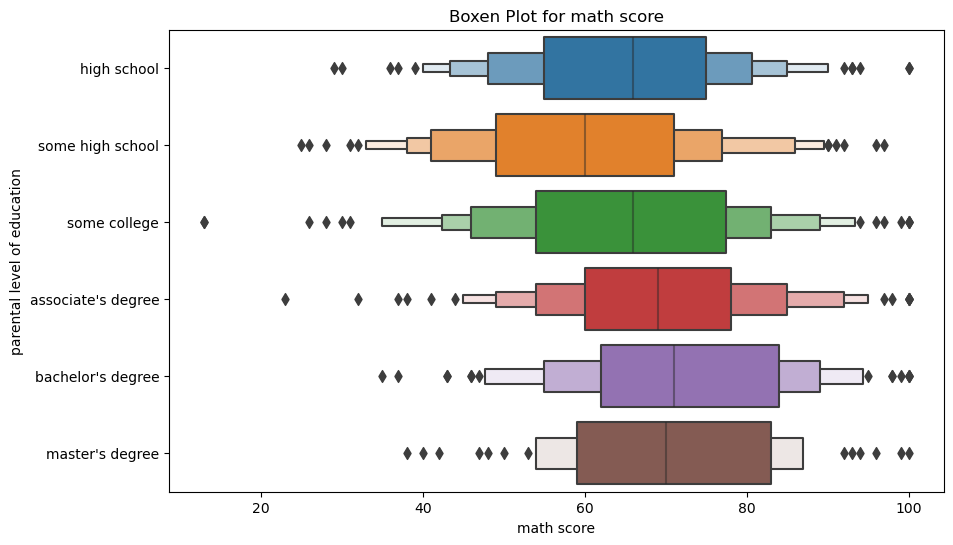

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

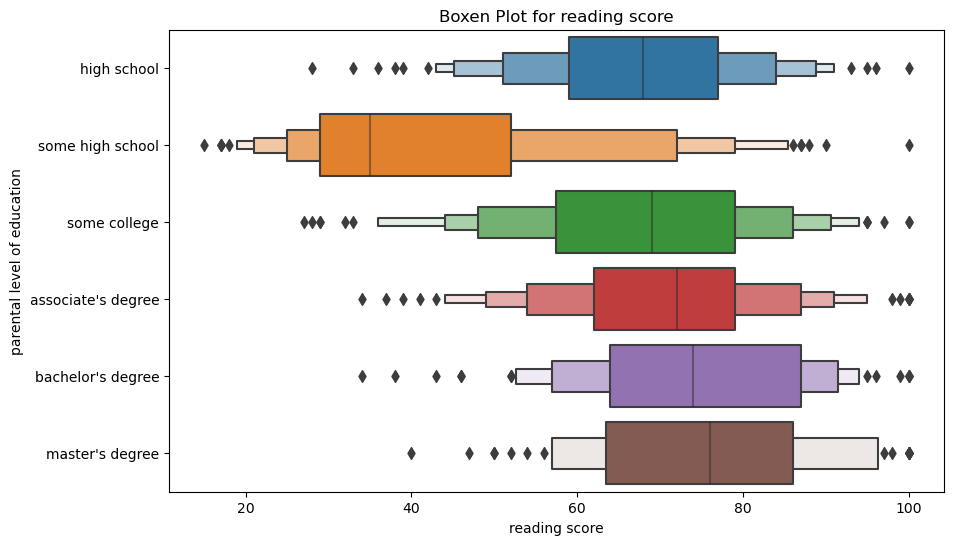

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

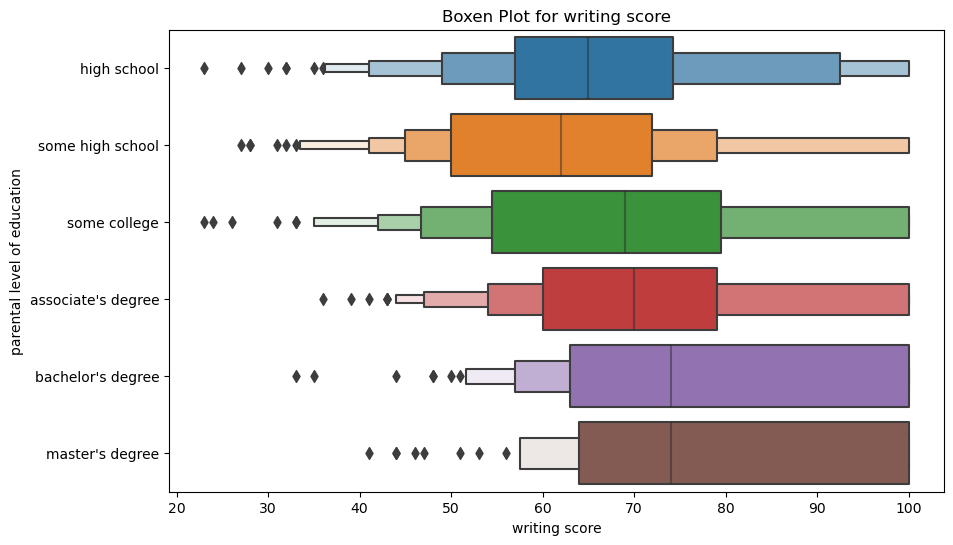

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

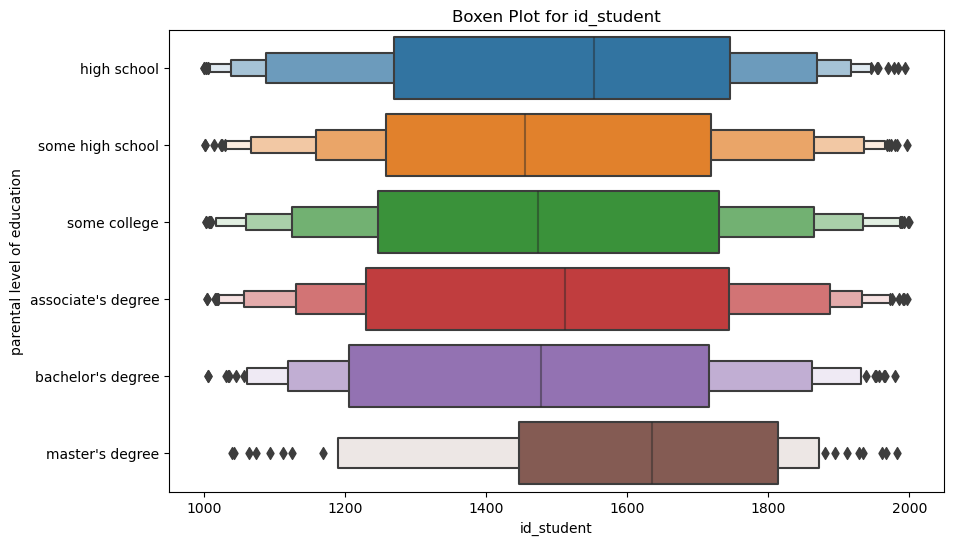

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

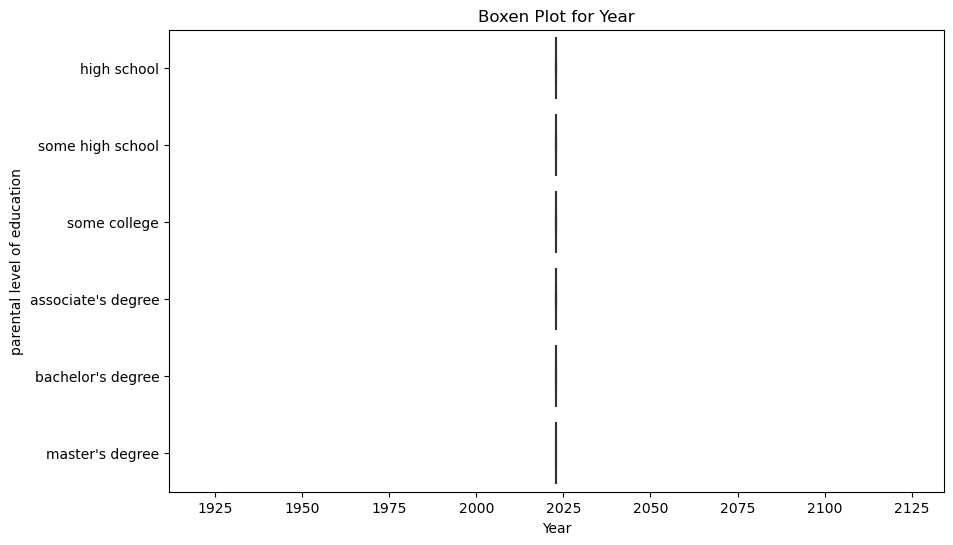

c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\enrique.penalver.GLOBAL\AppData\Local\anaconda3\envs\esasde_data_exploration_s4\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c

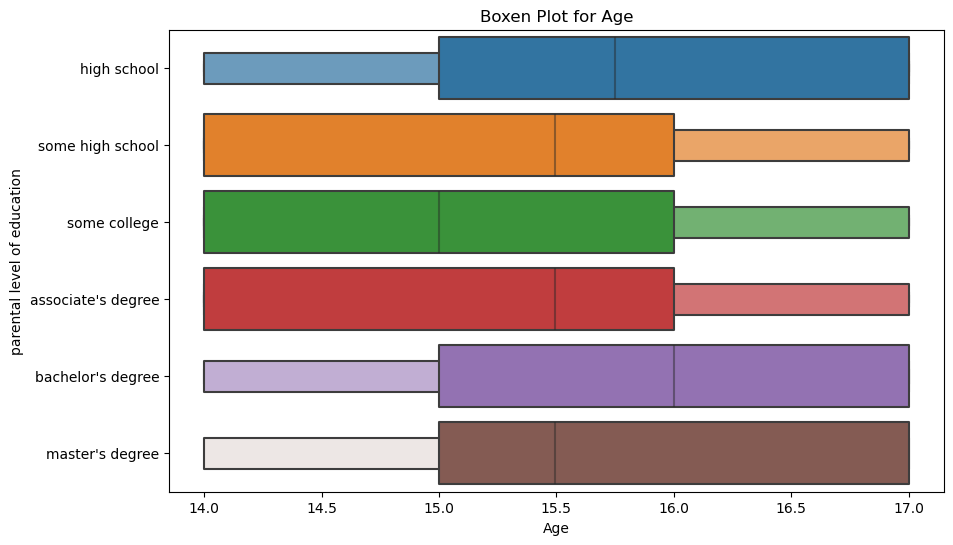

In [294]:
#for col in df.columns
#    id df[col].dtype== "0"





#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



### 2-variable Analysis with Lunch column 

### 2-variable Analysis with gender column 

### 2-variable Analysis with Test preparation course column 

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client